In [89]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
import pandas as pd
import numpy as np

def plot_animation(sigma):
    plt.rcParams["animation.html"] = "jshtml"
    plt.rcParams['figure.dpi'] = 150  
    plt.ioff()

    x = pd.read_csv('out/sigma_{}/animation_x.csv'.format(sigma)).to_numpy().flatten()
    y = pd.read_csv('out/sigma_{}/animation_y.csv'.format(sigma)).to_numpy()
    y_exact = pd.read_csv('out/sigma_{}/animation_y_exact.csv'.format(sigma)).to_numpy()

    fig, ax = plt.subplots()

    def animate(frame):
        plt.cla()
        plt.plot(x, y_exact[frame])
        plt.plot(x, y[frame])
        ax.legend(['exact solution', 'numerical solution'])
        ax.set_ylim(0, 4.5)
        ax.set_xlim(0, 10)

    return animation.FuncAnimation(fig, animate, frames = 64, interval=20)

In [92]:
def plot_errors(sigma):
    fig, ax = plt.subplots()

    data = pd.read_csv('out/sigma_{}/errors.csv'.format(sigma))
    h = data['h']
    error = data['error']

    h = h[h < 1]
    error = error[error.size - h.size:]
    m, b = np.polyfit(np.log(h), np.log(error), 1)
    print("order of convergence = ", m)

    ax.set_xlabel("h")
    ax.set_ylabel("error")
    ax.scatter(h, error)
    ax.set_yscale('log')
    ax.set_xscale('log')

    plt.show()

# Лабораторная работа 3. Решение уравнения нелинейной теплопроводности.

$$
\frac{\partial u}{\partial t} = \frac{\partial}{\partial x} \left( u^{\alpha} \frac{\partial u}{\partial x} \right)
$$

Будем применять шеститочечный шаблон с весом $\sigma$ на нижнем слое и $1 - \sigma$ на верхнем слое.

## $\sigma = 1$ (Явная схема)

In [90]:
plot_animation("1.0")

Устойчивость схемы зависит от значения u, и когда u достигает определенного значения при заданном количестве шагов по времени и пространству, схема разваливается.

## $\sigma = 0.5$ (Схема Кранка-Николсон)

In [75]:
plot_animation(0.5)

При измерении нормы ошибки $|||\xi||| = max \left\{ ||\xi_i||_2 | i \in 0 \dots k \right\} $, при $h / \tau^2 = const$ получаем 1 порядок сходимости. В этой задаче рассматривая другие нормы и отношения шагов по времени и пространству, можно получить другие порядки сходимости.

order of convergence =  1.0402963824861913


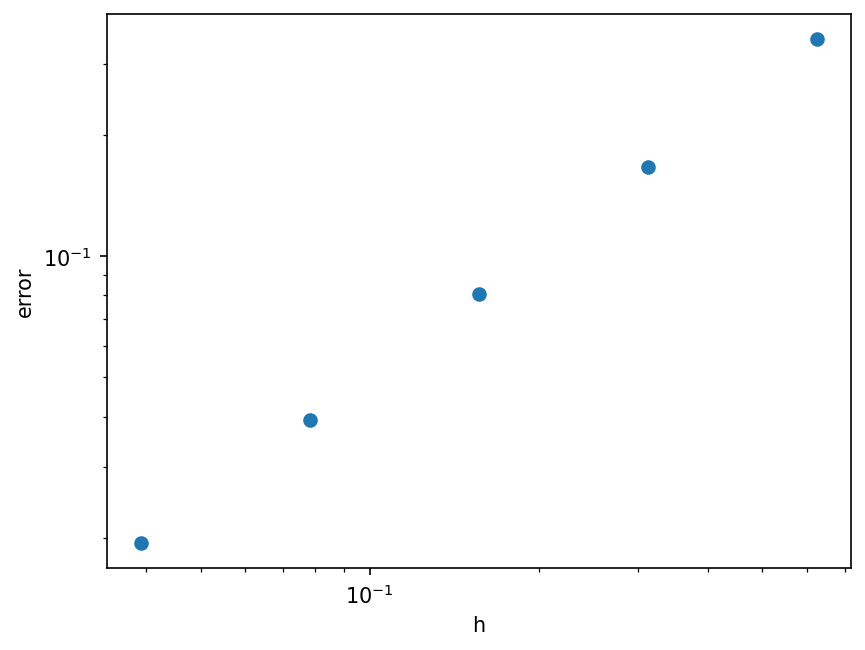

In [94]:
plot_errors('0.5')

## $\sigma = 0$ (Неявная схема)

In [91]:
plot_animation('0.0')

При рассмотрении прежней нормы и отношения шагов по времени и пространству, получаем тот же 1 порядок сходимости.

order of convergence =  1.0244013902110953


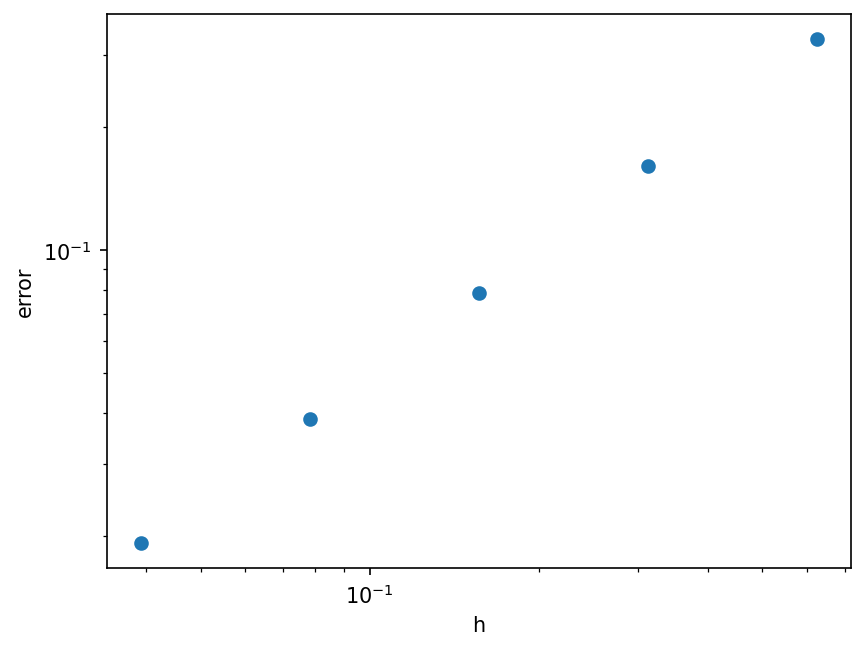

In [95]:
plot_errors('0.0')